<a href="https://colab.research.google.com/github/Ommanchanda/Machine_Learning/blob/main/Multicollinearity_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Multicollinearity Dtetection & Remedy**

In [66]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [67]:
from sklearn.datasets import fetch_california_housing

In [68]:
data=fetch_california_housing()

In [69]:
df=pd.DataFrame(data.data,columns=data.feature_names)
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [70]:
df['price']=data.target

In [71]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [72]:
df.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
price,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


<Axes: >

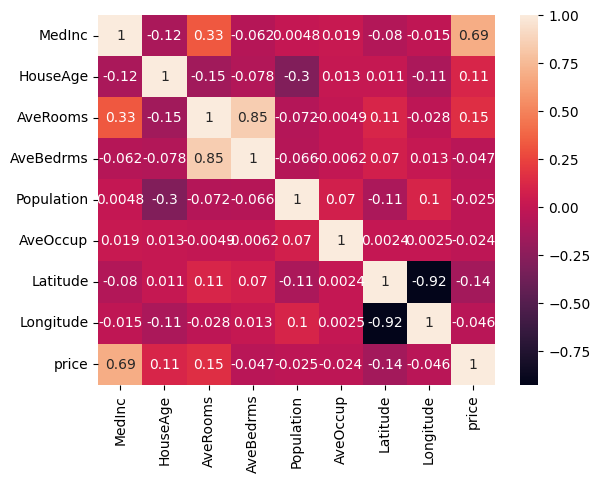

In [73]:
sns.heatmap(df.corr(),annot=True)

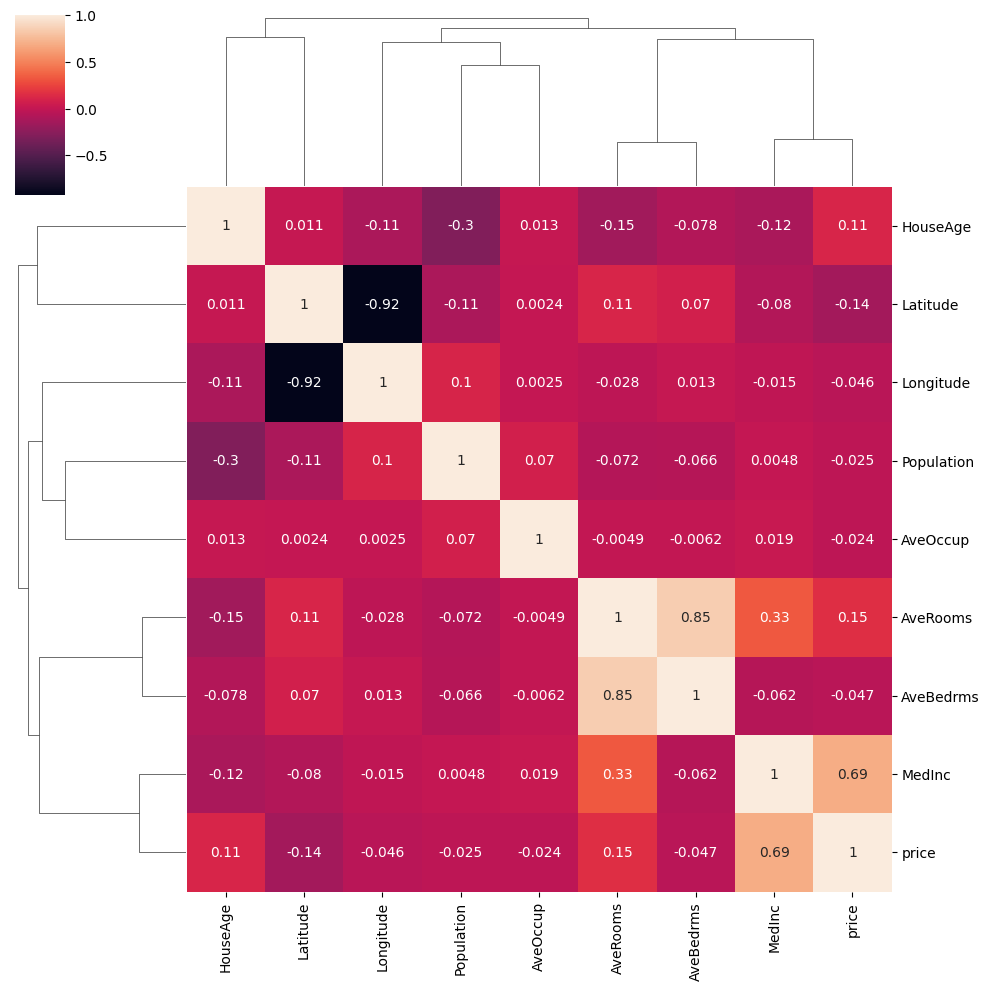

In [74]:
sns.clustermap(df.corr(),annot=True)

In [75]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [76]:
vif=pd.DataFrame()
vif['Feature']=df.columns
vif['VIF']=[variance_inflation_factor(df.values,i) for i in range(len(df.columns))]

In [77]:
vif

,Feature,VIF
0,MedInc,19.624998
1,HouseAge,7.592663
2,AveRooms,47.956351
3,AveBedrms,45.358192
4,Population,2.936078
5,AveOccup,1.099530
6,Latitude,568.497332
7,Longitude,640.064211
8,price,9.285659


In [78]:
df1=df.copy()

In [79]:
df1.drop('Longitude',axis=1,inplace=True)

In [80]:
vif=pd.DataFrame()
vif['Feature']=df1.columns
vif['VIF']=[variance_inflation_factor(df1.values,i) for i in range(len(df1.columns))]
vif

,Feature,VIF
0,MedInc,18.639889
1,HouseAge,7.346583
2,AveRooms,44.714760
3,AveBedrms,42.072000
4,Population,2.796280
5,AveOccup,1.099394
6,Latitude,22.873934
7,price,9.193500


In [81]:
df1.drop('AveRooms',axis=1,inplace=True)

In [82]:
vif=pd.DataFrame()
vif['Feature']=df1.columns
vif['VIF']=[variance_inflation_factor(df1.values,i) for i in range(len(df1.columns))]
vif

,Feature,VIF
0,MedInc,10.584081
1,HouseAge,7.260588
2,AveBedrms,6.440667
3,Population,2.762794
4,AveOccup,1.098719
5,Latitude,22.094483
6,price,8.674858


In [83]:
df1.drop('Latitude',axis=1,inplace=True)

In [84]:
vif=pd.DataFrame()
vif['Feature']=df1.columns
vif['VIF']=[variance_inflation_factor(df1.values,i) for i in range(len(df1.columns))]
vif

,Feature,VIF
0,MedInc,8.855104
1,HouseAge,4.156145
2,AveBedrms,4.264253
3,Population,2.223926
4,AveOccup,1.098671
5,price,8.607339


In [85]:
x=df1.iloc[:,:-1]
y=df1.iloc[:,-1]

In [86]:
x

,MedInc,HouseAge,AveBedrms,Population,AveOccup
0,8.3252,41.0,1.023810,322.0,2.555556
1,8.3014,21.0,0.971880,2401.0,2.109842
2,7.2574,52.0,1.073446,496.0,2.802260
3,5.6431,52.0,1.073059,558.0,2.547945
4,3.8462,52.0,1.081081,565.0,2.181467
...,...,...,...,...,...
20635,1.5603,25.0,1.133333,845.0,2.560606
20636,2.5568,18.0,1.315789,356.0,3.122807
20637,1.7000,17.0,1.120092,1007.0,2.325635
20638,1.8672,18.0,1.171920,741.0,2.123209


In [87]:
y

,price
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422
...,...
20635,0.781
20636,0.771
20637,0.923
20638,0.847


In [88]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [89]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()

In [90]:
x_train=ss.fit_transform(x_train)
x_test=ss.transform(x_test)

In [91]:
ss

StandardScaler()

In [92]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()

In [93]:
model.fit(x_train,y_train)

LinearRegression()

In [94]:
y_pred=model.predict(x_test)

In [95]:
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

In [96]:
mse=mean_squared_error(y_test,y_pred)
mse

0.6504069750823951

In [97]:
mae=mean_absolute_error(y_test,y_pred)
mae

0.6009793400064672

In [98]:
r2s=r2_score(y_test,y_pred)
r2s

0.5041461345294829

In [101]:
 adj_rs=(1-(1-r2s)*(len(y_test))/(len(y_test)-x_test.shape[1]-1))
 adj_rs

0.5034243676219566

**Recursive Feature elimination**

In [103]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [104]:
from sklearn.feature_selection import RFE

In [105]:
rfe=RFE(LinearRegression(),n_features_to_select=5)

In [106]:
rfe.fit(x,y)

RFE(estimator=LinearRegression(), n_features_to_select=5)

In [109]:
rfe.support_
#will tell us in an order wether the feature on that serial nuber is selected

array([ True, False,  True,  True, False, False,  True,  True])

In [110]:
rfe.ranking_

array([1, 2, 1, 1, 4, 3, 1, 1])

In [112]:
rfe.predict(x)

array([3.98910415, 4.03191679, 3.44103761, ..., 0.22630645, 0.36574672,
       0.57907858])